In [1]:
import folium
import pandas as pd
import json
import matplotlib.pyplot as plt

In [5]:
map = folium.Map(location = [35.8, 128], zoom_start = 10)  #7이면 우리 나라가 다 보임
df = pd.read_csv('camping_loc.csv')
map

In [8]:
df_marker = df.filter(['캠핑(야영)장명', '캠핑(야영)장구분', '위도', '경도'])

def view_camping():
    for i in df_marker.index:
        name = df_marker.loc[i, '캠핑(야영)장명']
        lat = df_marker.loc[i, '위도']
        lng = df_marker.loc[i, '경도']

        popup = folium.Popup(name, min_width = 100, nax_width = 150)
        
        folium.Marker([lat,lng], popup = popup).add_to(map)
        
view_camping()
map

{'서울': 주소    8
dtype: int64, '경기': 주소    534
dtype: int64, '강원': 주소    475
dtype: int64, '인천': 주소    64
dtype: int64, '충남': 주소    189
dtype: int64, '충북': 주소    161
dtype: int64, '대전': 주소    6
dtype: int64, '세종': 주소    4
dtype: int64, '전남': 주소    137
dtype: int64, '전북': 주소    116
dtype: int64, '광주': 주소    6
dtype: int64, '경남': 주소    226
dtype: int64, '경북': 주소    248
dtype: int64, '대구': 주소    17
dtype: int64, '부산': 주소    15
dtype: int64, '울산': 주소    19
dtype: int64, '제주': 주소    45
dtype: int64}
주소    2270
dtype: int64


TypeError: only size-1 arrays can be converted to Python scalars

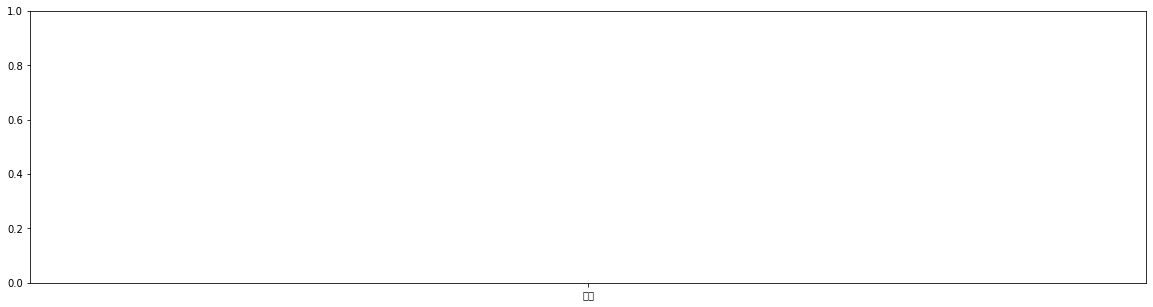

In [14]:
regions = [['서울'], ['경기'], ['강원'], ['인천'], ['충남', '충청남도'], ['충북', '충청북도'],
          ['대전'], ['세종'], ['전남', '전라남도'], ['전북', '전라북도'], ['광주'],
          ['경남', '경상남도'], ['경북', '경상북도'], ['대구'], ['부산'], ['울산'], ['제주']]
regions_cnt = dict()

for region_names in regions:
    regions_cnt[region_names[0]] = 0
    for region_name in region_names:
        regions_cnt[region_names[0]] += df[['주소']].apply(lambda x: x.str.contains(region_name, na = False)).sum()
        
print(regions_cnt)  #왜 나는 이 딕셔너리가 이상하게 나오지? 분명 똑같이 했는데..
print(sum(regions_cnt.values()))

plt.figure(figsize = (20,5))
plt.bar(regions_cnt.keys(), regions_cnt.values())